In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

In [3]:
df=df1.append(df2)

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
df.shape

(2919, 81)

In [7]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [8]:
for i in df.columns:
    if (df[i].isnull().sum()>df.shape[0]*0.6):
        df.drop([i],axis=1,inplace=True)
#%60 boş olanları sildim        

In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 77, dtype: int64

In [10]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [12]:
abs(df.corr()["SalePrice"]).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

<AxesSubplot:>

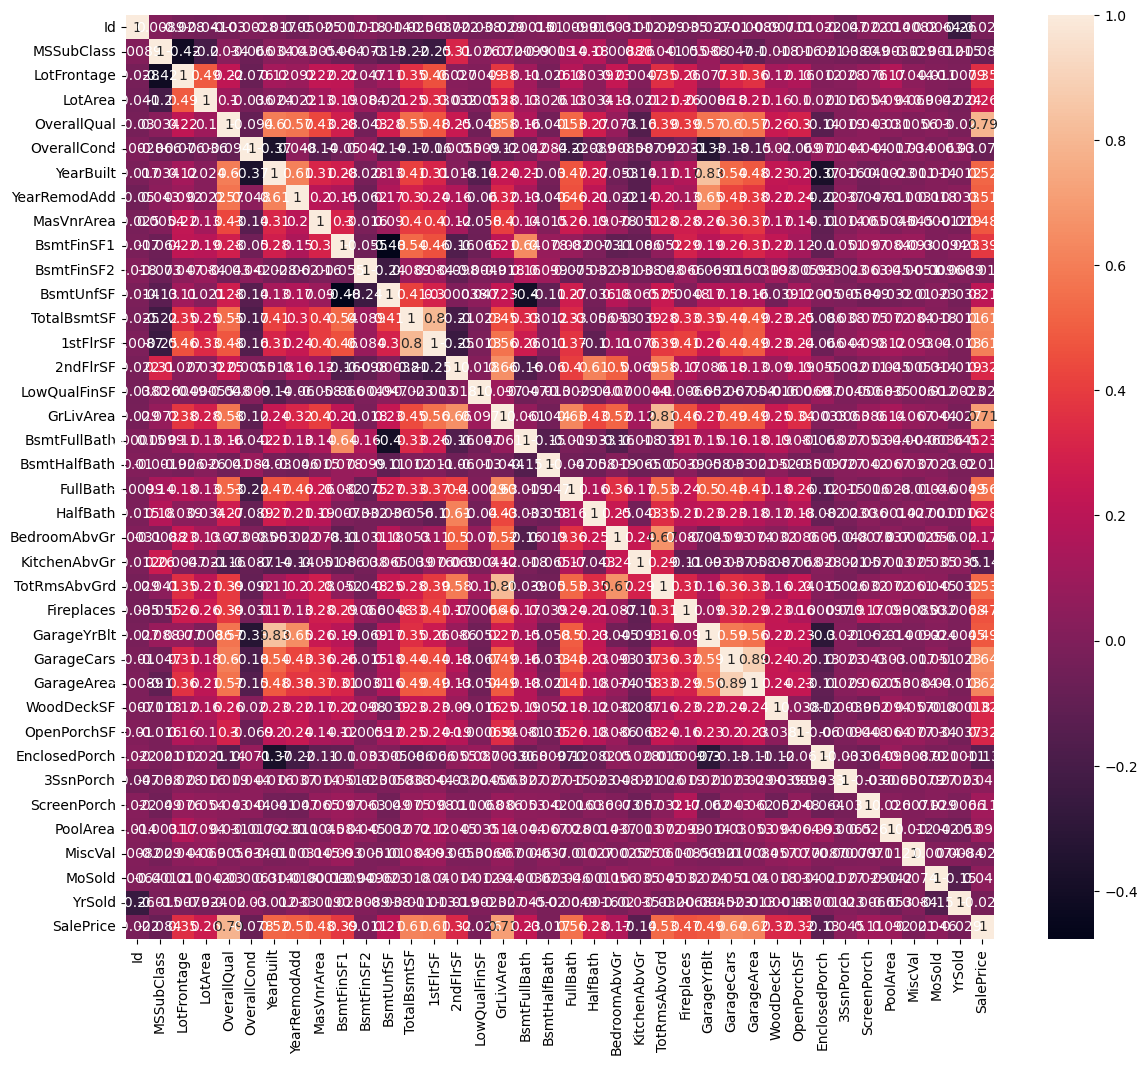

In [13]:
plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

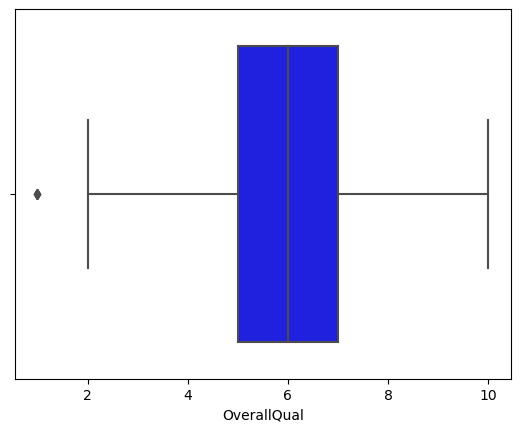

In [14]:
sns.boxplot(df['OverallQual'],color='blue');

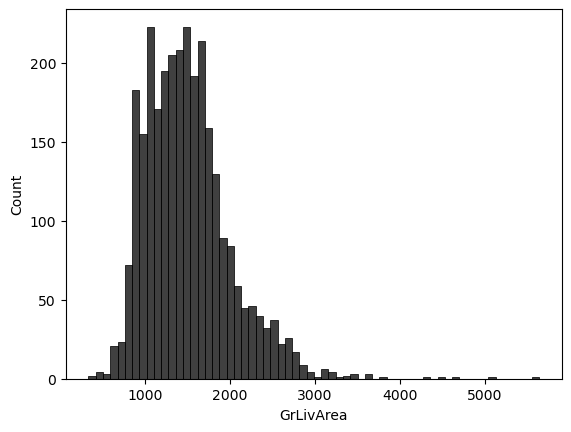

In [15]:
sns.histplot(df['GrLivArea'],color='black');

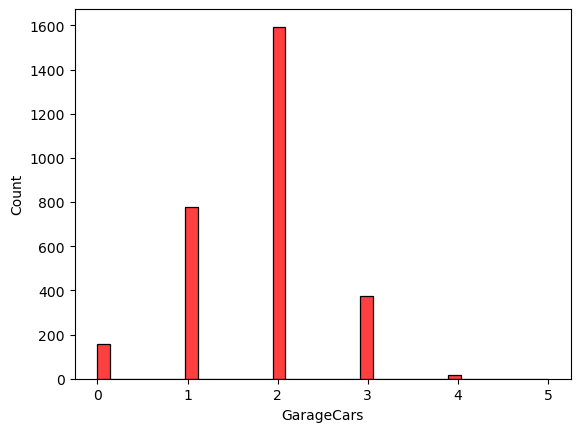

In [16]:
sns.histplot(df['GarageCars'],color='red');

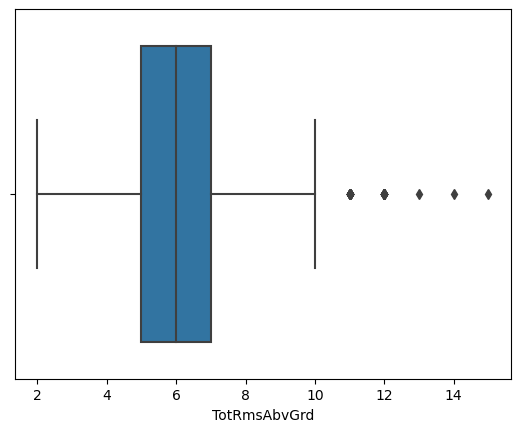

In [17]:
sns.boxplot(df['TotRmsAbvGrd']);

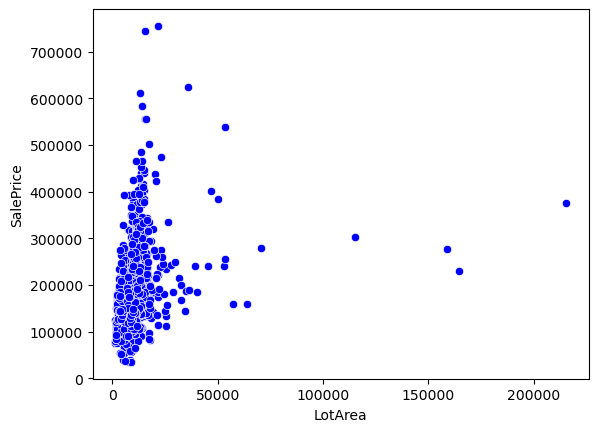

In [18]:
sns.scatterplot(x='LotArea',y='SalePrice',data=df,color='blue');

In [19]:
df['Age']=2022-df['YearBuilt']

In [20]:
df['BsmtFinType2']=label_encoder.fit_transform(df['BsmtFinType2'])
df['Heating']=label_encoder.fit_transform(df['Heating'])

In [21]:
outliers = df.quantile(.97)
df = df[(df['SalePrice']<outliers['SalePrice'])]
df = df[(df['GrLivArea']<outliers['GrLivArea'])]
df = df[(df['GarageCars']<outliers['GarageCars'])]
df = df[(df['GarageArea']<outliers['GarageArea'])]
df = df[(df['TotalBsmtSF']<outliers['TotalBsmtSF'])]
df = df[(df['TotRmsAbvGrd']<outliers['TotRmsAbvGrd'])]
df = df[(df['FullBath']<outliers['FullBath'])]
df = df[(df['Age']<outliers['Age'])]
df = df[(df['TotRmsAbvGrd']<outliers['TotRmsAbvGrd'])]
df = df[(df['OverallQual']<outliers['OverallQual'])]

In [22]:
df['GrLivArea']=df['GrLivArea']**2
df['GarageCars']=df['GarageCars']**2
df['OverallQual']=df['OverallQual']**2
df['TotRmsAbvGrd']=df['TotRmsAbvGrd']**2
df['Fireplaces']=df['Fireplaces']**2
df['OverallCond']=df['OverallCond']/2
df['Age']=df['Age']**2


In [23]:
x = df[['GrLivArea','GarageArea','TotalBsmtSF','GarageCars','TotRmsAbvGrd','FullBath','Age',
        'OverallQual','TotRmsAbvGrd','OverallQual','Heating','1stFlrSF','YearRemodAdd','Fireplaces',
       'BsmtFinSF1','LotArea','GrLivArea','1stFlrSF','HalfBath','OverallCond']]

In [24]:
x.sample(3)

,GrLivArea,GarageArea,TotalBsmtSF,GarageCars,TotRmsAbvGrd,FullBath,Age,OverallQual,TotRmsAbvGrd,OverallQual,Heating,1stFlrSF,YearRemodAdd,Fireplaces,BsmtFinSF1,LotArea,GrLivArea,1stFlrSF,HalfBath,OverallCond
254,1726596,294.0,1314.0,1.0,25,1,4225,25,25,25,1,1314,1957,0,922.0,8400,1726596,1314,0,3.0
1225,1295044,264.0,588.0,1.0,36,1,4096,36,36,36,1,1138,1958,0,507.0,10482,1295044,1138,0,4.0
1096,1836025,0.0,684.0,0.0,49,1,11664,36,49,36,1,773,2006,0,0.0,6882,1836025,773,1,3.5


In [25]:
y=df[['SalePrice']]

In [26]:
y.shape

(614, 1)

In [27]:
y.head(10)

,SalePrice
5,143000.0
9,118000.0
10,129500.0
12,144000.0
14,157000.0
15,132000.0
16,149000.0
18,159000.0
19,139000.0
21,139400.0


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
#seed (42)
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=13)

In [30]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((491, 20), (123, 20), (491, 1), (123, 1))

In [31]:
lr=LinearRegression()

In [32]:
model=lr.fit(x_train,y_train)

In [33]:
tahmin=model.predict(x_test)
tahmin

array([[123262.84946736],
       [122873.86374674],
       [138362.98385485],
       [123153.59007253],
       [128537.14564975],
       [172994.52858344],
       [125151.09780033],
       [ 80525.34844028],
       [117649.512988  ],
       [161471.33767883],
       [121266.2163194 ],
       [130676.07664483],
       [109665.9241112 ],
       [ 61743.48407653],
       [144262.71152985],
       [119334.51708852],
       [130479.81217789],
       [119929.82817396],
       [144715.87623551],
       [157549.37916551],
       [110879.82212306],
       [134696.371467  ],
       [115867.17094386],
       [173157.53375388],
       [117841.15400719],
       [177936.95907583],
       [137015.92956281],
       [130210.30768055],
       [126222.74304957],
       [132027.12341608],
       [156061.839894  ],
       [165822.98408244],
       [142539.54665631],
       [141087.21764837],
       [169674.63350098],
       [111946.35404714],
       [124294.40959052],
       [114957.75183842],
       [1439

In [34]:
(mean_squared_error(tahmin,y_test))**.5

17661.651718603043

In [35]:
r2_score(tahmin,y_test)

0.6177499791486311

In [36]:
R=Ridge()
L=Lasso()

In [37]:
R.fit(x_train,y_train)
tahmin2=R.predict(x_test)

In [38]:
L.fit(x_train,y_train)
tahmin3=L.predict(x_test)

In [39]:
(mean_squared_error(tahmin2,y_test))**.5

17594.374840068584

In [40]:
r2_score(tahmin2,y_test)

0.6206343677116944

In [41]:
(mean_squared_error(tahmin3,y_test))**.5

17657.291115752552

In [42]:
r2_score(tahmin3,y_test)

0.617897046584366